#Problem Statement : To Predict the percentage of marks of the students based on the number of hours they studied

##Author Name: Patewar Ganesh Arjun

##Model used: Linear Regression()


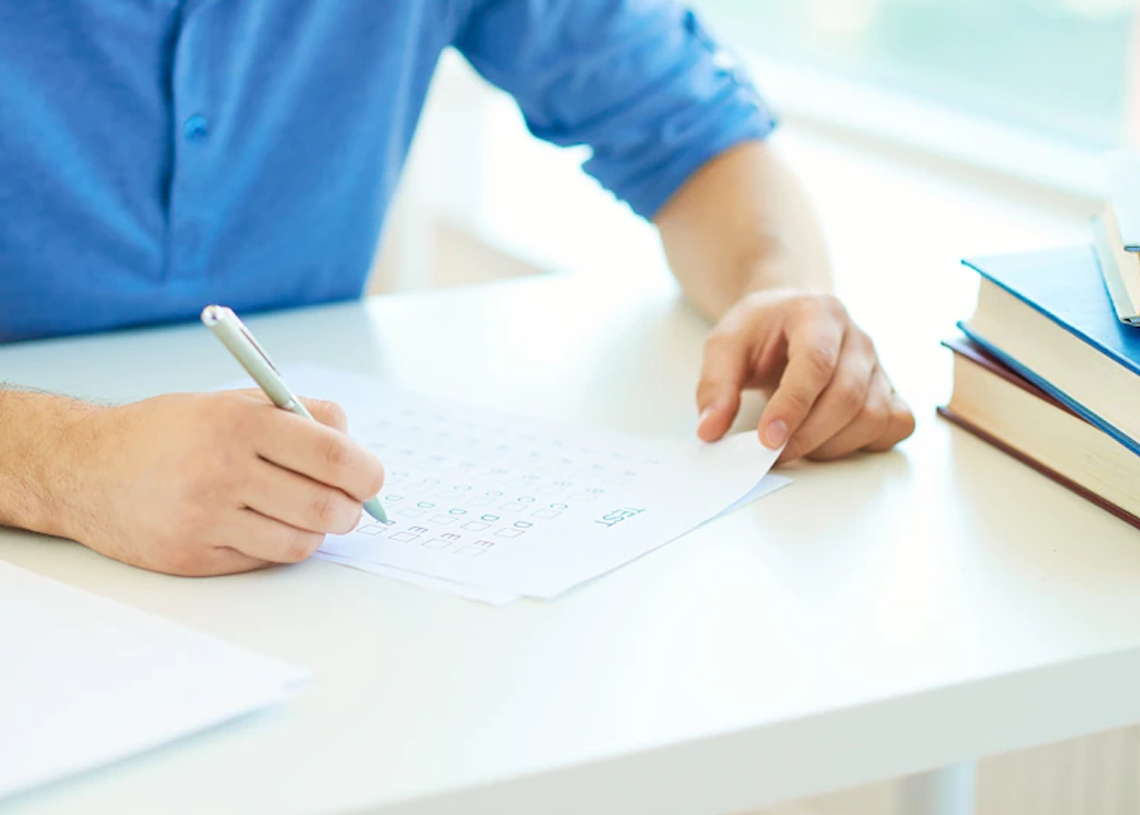

#Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# importing functions from sklearn for model building
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Data importing:

In [ ]:
x=link="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df=pd.read_csv(link)

#First look of Data:

In [ ]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


#Data Information:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


#Data Describe:

In [ ]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#Checking duplicate values:

In [ ]:
df.duplicated().sum()

0

#Checking Null values:

In [ ]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

##Plot 1: Scatterplot

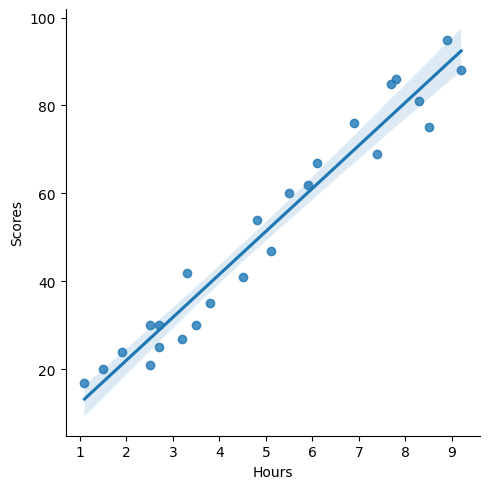

In [ ]:
sns.lmplot(data=df,x='Hours',y='Scores')

plt.show()

####From above plot we can see that data is almost linear in nature. So Linear Regression model will give best result.

##Plot 2:kdeplot (checking distribution of data points)

In [ ]:
df['Scores'].median()

47.0

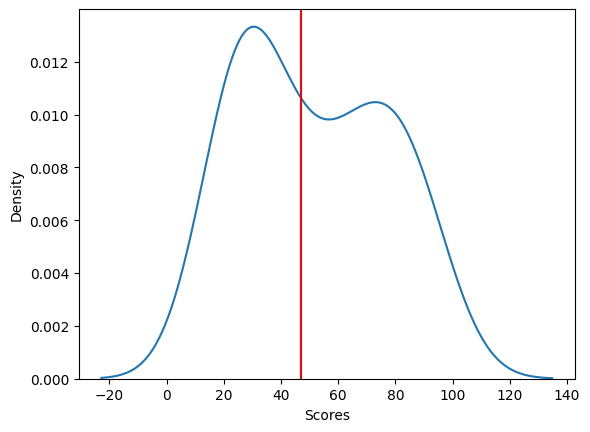

In [ ]:
sns.kdeplot(data=df,x=df['Scores'])
plt.axvline(df['Scores'].median(),c='red')

####From above kdeplot we can see that data is almost normally distributed. 

##Plot 3. Boxplot:

<Axes: >

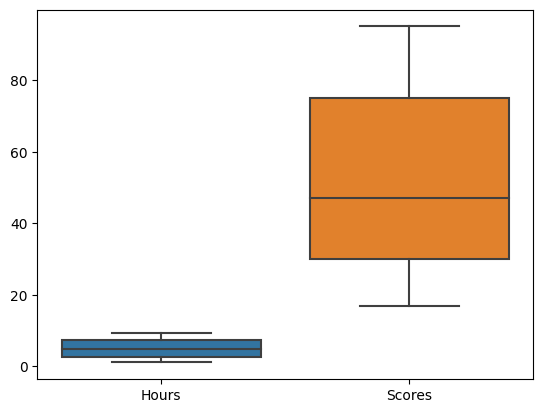

In [ ]:
sns.boxplot(data=df)

####From boxplot we can see that there is no any outlier present in given data.

#Model building:

###1.Defining dependent and independent variables.


In [ ]:
# Dependent Variable:
X=df['Hours']

In [ ]:
# independent Variable:
y=df['Scores']

###2. Splitting data into Train and Test data.

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=0)

# Here test_size=0.2 means 20% data is train dataset, which is sufficient for model building
# Here I am using random_state=0 , by which data in train and test dataset remain same throughout.

In [ ]:
print(f'The shape of X_train is {X_train.shape}')  # size of train data
print(f'The shape of X_test is {X_test.shape}')    # size of test data

The shape of X_train is (20,)
The shape of X_test is (5,)


In [ ]:
X_train=(X_train.values.reshape(-1, 1))
X_train

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [ ]:
X_test=(X_test.values.reshape(-1,1))
X_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

##3.Using Linear Regression model.

In [ ]:
regressor=LinearRegression()

##4.Training the model.

In [ ]:
regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
# finding the intercept of model

print(f'The intercept is {regressor.intercept_}')

The intercept is 2.018160041434662


In [ ]:
#finding the values of coefficients
print(f'The coefficient value of "Hours" parameter is {regressor.coef_}')


The coefficient value of "Hours" parameter is [9.91065648]


##5.Prediction of train and test data

In [ ]:
# predicting the train data
y_train_pred=regressor.predict(X_train)
y_train_pred

array([39.67865467, 20.84840735, 79.32128059, 70.40168976, 12.91988217,
       52.56250809, 78.33021494, 34.72332643, 84.27660883, 93.19619966,
       62.47316457, 36.70545772, 28.77693254, 56.52677068, 28.77693254,
       86.25874013, 26.79480124, 49.58931115, 90.22300272, 46.6161142 ])

In [ ]:
#predicting the test data
y_test_pred=regressor.predict(X_test)
y_test_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

##6.Checking the accuracy and performance of model

In [ ]:
regressor.score(X_train,y_train)
print(f'The score for train data is {regressor.score(X_train,y_train)}')

The score for train data is 0.9515510725211552


In [ ]:
regressor.score(X_test,y_test)
print(f'The score for test data is {regressor.score(X_test,y_test)}')

The score for test data is 0.9454906892105354


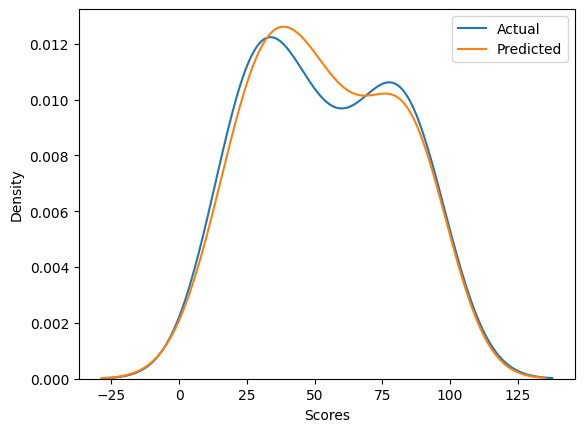

In [ ]:
sns.kdeplot(data=y_train,label='Actual')
sns.kdeplot(data=y_train_pred,label='Predicted')

plt.legend()

####Based on the scores of the train and test data, we observe that the model achieves an accuracy score of 95% and 94.5% respectively. This indicates that the model is well-suited for the given data, as there is neither underfitting nor overfitting.

####Additionally, upon examining the distplot above, we can observe that the line representing the Actual and Predicted values is very close, suggesting that the error is minimal.

# Prediction based on given input

####Que. What will be predicted score if a student studies for 9.25 hrs/ day?


In [ ]:
Hours=9.5
score=regressor.predict([[9.25]])

print(f'The predicted score if a student studies for 9.25 hrs/ day is {score[0]}')

The predicted score if a student studies for 9.25 hrs/ day is 93.69173248737539
